In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
class evaluation:
    def __init__(self, true_s):
        self.true_df = pd.DataFrame(true_s)
        self.true_df.columns = ['swell']
        self.true_df['swell(t+1)'] = self.true_df['swell'].shift(-1)
        self.true_df['swell(t+2)'] = self.true_df['swell'].shift(-2)
        self.true_df['swell(t-1)'] = self.true_df['swell'].shift(1)
        self.true_df['swell(t-2)'] = self.true_df['swell'].shift(2)
    
        self.swell_columns = ['swell(t+1)','swell(t+2)','swell(t-1)','swell(t-2)']
    
    def _eval_one(self, pred):
        true = self.true_df.loc[pred.name]
        swell = true['swell'] 
        p_swell = pred['pred']

        if swell == 0 and p_swell == 0:
            return 1

        if swell == 1 and p_swell == 1:
            return 2

        if swell == 0 and p_swell == 1:
            if (true[self.swell_columns].values == 1).any():
                return 0
            else:
                return -1

        if swell == 1 and p_swell == 0:
            if (pred[self.swell_columns].values == 1).any():
                return 0
            else: 
                return -2
    
    def evaluate(self, pred):
        pred_df = pd.DataFrame(pred)
        pred_df.columns = ['pred']
        pred_df['swell(t+1)'] = pred_df['pred'].shift(-1)
        pred_df['swell(t+2)'] = pred_df['pred'].shift(-2)
        pred_df['swell(t-1)'] = pred_df['pred'].shift(1)
        pred_df['swell(t-2)'] = pred_df['pred'].shift(2)

        result = []
        for index in pred_df.index:
            result.append(self._eval_one(pred_df.loc[index]))
        
        #print(result)
        print(pd.Series(result).value_counts())
        
        return np.sum(result)

In [3]:
num_values = 7
degrees_week = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_week)
sin_week = np.sin(np.deg2rad(degrees_week))
print(sin_week)
cos_week = np.cos(np.deg2rad(degrees_week))
print(cos_week)

num_values = 12
degrees_month = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_month)
sin_month = np.sin(np.deg2rad(degrees_month))
print(sin_month)
cos_month = np.cos(np.deg2rad(degrees_month))
print(cos_month)

num_values = 31
degrees_day = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_day)
sin_day = np.sin(np.deg2rad(degrees_day))
print(sin_day)
cos_day = np.cos(np.deg2rad(degrees_day))
print(cos_day)

num_values = 24
degrees_hour = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_hour)
sin_hour = np.sin(np.deg2rad(degrees_hour))
print(sin_hour)
cos_hour = np.cos(np.deg2rad(degrees_hour))
print(cos_hour)

[   0.           51.42857143  102.85714286  154.28571429  205.71428571
  257.14285714  308.57142857]
[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]
[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.]
[  0.00000000e+00   5.00000000e-01   8.66025404e-01   1.00000000e+00
   8.66025404e-01   5.00000000e-01   1.22464680e-16  -5.00000000e-01
  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01  -5.00000000e-01]
[  1.00000000e+00   8.66025404e-01   5.00000000e-01   6.12323400e-17
  -5.00000000e-01  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01
  -5.00000000e-01  -1.83697020e-16   5.00000000e-01   8.66025404e-01]
[   0.           11.61290323   23.22580645   34.83870968   46.4516129
   58.06451613   69.67741935   81.29032258   92.90322581  104.51612903
  116.12903226  127.74193548  139.35483871  150.96774194  162.58064516
  174.19354839  185.806

In [4]:
def make_coord(date,num_class):
    # 1 ~ 12, 1 ~ 7, 1 ~ 31
    degrees = np.linspace(0,360,num_values + 1)[:-1]
    sin = np.sin(np.deg2rad(degrees))
    cos = np.cos(np.deg2rad(degrees))
    return sin, cos


def date2coord(date, sin, cos):
    return cos[date-1], sin[date-1]


def date2week(x):
    y = int(str(x)[:4])
    m = int(str(x)[4:6])
    d = int(str(x)[6:8])
    day = datetime(y, m, d)
    return day.weekday()

In [5]:
df = pd.read_csv('./merged_info_data.tsv',sep='\t',index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 65 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [6]:
df['swell'].value_counts()

0.0    31800
1.0     2592
Name: swell, dtype: int64

In [7]:
df['swell'] = df['swell'] + df['weather_deterioration']

In [8]:
df['swell'].value_counts()

0.0    26863
1.0     4937
2.0     2592
Name: swell, dtype: int64

In [9]:
df['month'] = df['hour'].apply(lambda x:int(str(x)[4:6]))
df['day'] = df['hour'].apply(lambda x:int(str(x)[6:8]))
df['day_hour'] = df['hour'].apply(lambda x:int((str(x)[8:])))
df['week'] = df['hour'].apply(date2week)
df['week'] = df['week'] + 1 
df['year'] = df['hour'].apply(lambda x:int(str(x)[:4]))

In [10]:
df['day_coord'] = df['day'].apply(date2coord, args=(sin_day, cos_day,))
df['month_coord'] = df['month'].apply(date2coord, args=(sin_month, cos_month))
df['week_coord'] = df['week'].apply(date2coord, args=(sin_week, cos_week,))
df['hour_coord'] = df['day_hour'].apply(date2coord, args=(sin_hour, cos_hour,))

In [11]:
s = (df[df['swell'].isnull()]['hour']//100).value_counts()
s

20170315    17
20171211    17
20161130    17
20170331    17
20141023    17
20161020    17
20140518    17
20170212    17
20150718    17
20140706    17
20150627    17
20160830    17
20171023    17
20171012    17
20141221    17
20170916    17
20160122    17
20150404    17
20150113    17
20140925    17
20170603    17
20161226    17
20151213    17
20160304    17
20151113    17
20160831     7
20170604     7
20171024     7
20140926     7
20171013     7
20150114     7
20141222     7
20151214     7
20150405     7
20150628     7
20140707     7
20150719     7
20170401     7
20171212     7
20170917     7
20151114     7
20170213     7
20140519     7
20160305     7
20161021     7
20170316     7
20161227     7
20161201     7
20160123     7
20141024     7
Name: hour, dtype: int64

In [12]:
s[s > 10].index.tolist()[0]

20170315

In [13]:
def get_prev_date(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return (today - timedelta(1)).strftime('%Y%m%d%H')

In [14]:
get_prev_date('20170101')

'2016123100'

In [15]:
test_date_hour = []
for d in s[s>10].index.astype(str):
    day = get_prev_date(d)
    for i in range(24):
        test_date_hour.append(str(int(day) + i))
len(test_date_hour)

600

In [16]:
df['swell(t+1)'] = df['swell'].shift(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 75 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [17]:
df.columns

Index(['hour', 'climate', 'weather_deterioration', 'swell',
       '21229_GUST풍속 1(m/s)', '21229_GUST풍속(m/s)', '21229_기온(°C)',
       '21229_수온(°C)', '21229_습도(%)', '21229_유의파고(m)', '21229_일시',
       '21229_최대파고(m)', '21229_파주기(sec)', '21229_파향(deg)', '21229_평균파고(m)',
       '21229_풍속(m/s)', '21229_풍속1(m/s)', '21229_풍향(deg)', '21229_풍향1(deg)',
       '21229_현지기압(hPa)', '22105_GUST풍속 1(m/s)', '22105_GUST풍속(m/s)',
       '22105_기온(°C)', '22105_수온(°C)', '22105_습도(%)', '22105_유의파고(m)',
       '22105_일시', '22105_최대파고(m)', '22105_파주기(sec)', '22105_파향(deg)',
       '22105_평균파고(m)', '22105_풍속(m/s)', '22105_풍속1(m/s)', '22105_풍향(deg)',
       '22105_풍향1(deg)', '22105_현지기압(hPa)', '22106_GUST풍속 1(m/s)',
       '22106_GUST풍속(m/s)', '22106_기온(°C)', '22106_수온(°C)', '22106_습도(%)',
       '22106_유의파고(m)', '22106_일시', '22106_최대파고(m)', '22106_파주기(sec)',
       '22106_파향(deg)', '22106_평균파고(m)', '22106_풍속(m/s)', '22106_풍속1(m/s)',
       '22106_풍향(deg)', '22106_풍향1(deg)', '22106_현지기압(hPa)', '22190_일시',
   

In [18]:
def output_change(x):
    if x == 2:
        return 1
    else:
        return 0

In [19]:
df['hour'] = df['hour'].astype(str)
df.set_index('hour',inplace=True)

In [20]:
scale_features = ['swell','21229_파주기(sec)','22105_파주기(sec)','22106_파주기(sec)']
#['swell']#,'22453_파주기(sec)','22106_파주기(sec)','22106_현지기압(hPa)']
nor_features = ['hour_coord','day_coord','month_coord']#,'hour_coord']
target = ['swell(t+1)']

In [21]:
minmax_scaler = MinMaxScaler(copy=True, feature_range=(0,1))
temp_df = df[scale_features+nor_features+target]

minmax_scaler.fit(temp_df[scale_features].dropna())
    
train = temp_df[scale_features+nor_features + target].drop(test_date_hour).dropna()
test = temp_df[scale_features+nor_features + target].loc[test_date_hour]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32199 entries, 2014010407 to 2017123123
Data columns (total 8 columns):
swell             32199 non-null float64
21229_파주기(sec)    32199 non-null float64
22105_파주기(sec)    32199 non-null float64
22106_파주기(sec)    32199 non-null float64
hour_coord        32199 non-null object
day_coord         32199 non-null object
month_coord       32199 non-null object
swell(t+1)        32199 non-null float64
dtypes: float64(5), object(3)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031400 to 2015111223
Data columns (total 8 columns):
swell             600 non-null float64
21229_파주기(sec)    599 non-null float64
22105_파주기(sec)    576 non-null float64
22106_파주기(sec)    587 non-null float64
hour_coord        600 non-null object
day_coord         600 non-null object
month_coord       600 non-null object
swell(t+1)        600 non-null float64
dtypes: float64(5), object(3)
memory usage: 42.2+ KB


In [22]:
test.fillna(method='ffill',inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031400 to 2015111223
Data columns (total 8 columns):
swell             600 non-null float64
21229_파주기(sec)    600 non-null float64
22105_파주기(sec)    600 non-null float64
22106_파주기(sec)    600 non-null float64
hour_coord        600 non-null object
day_coord         600 non-null object
month_coord       600 non-null object
swell(t+1)        600 non-null float64
dtypes: float64(5), object(3)
memory usage: 42.2+ KB


In [23]:
train_X = minmax_scaler.transform(train[scale_features].values)

x_list = []
for col in nor_features:
    X_arr = np.array(train[col].apply(lambda x:np.array(x)).tolist())
    x_list.append(X_arr)

if len(nor_features) > 0:
    nor_X = np.concatenate(x_list,axis=1)
    train_X = np.concatenate([train_X,nor_X], axis=1)

train_y = train[target].values
print(train_X.shape, train_y.shape)

(32199, 10) (32199, 1)


In [24]:
test_X = minmax_scaler.transform(test[scale_features].values)

x_list = []
for col in nor_features:
    X_arr = np.array(test[col].apply(lambda x:np.array(x)).tolist())
    x_list.append(X_arr)
    
if len(nor_features) > 0:
    nor_X = np.concatenate(x_list,axis=1)
    test_X = np.concatenate([test_X,nor_X], axis=1)


test_y = test[target].values
print(test_X.shape, test_y.shape)

(600, 10) (600, 1)


In [25]:
svc = LinearSVC(class_weight='balanced',random_state=10)
svc

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=10, tol=0.0001,
     verbose=0)

In [26]:
svc.fit(train_X,train_y)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=10, tol=0.0001,
     verbose=0)

In [27]:
pred = svc.predict(test_X)

In [28]:
pred.shape

(600,)

In [29]:
#test['pred'] = np.apply_along_axis(np.argmax,axis=1,arr=pred)
test['pred'] = np.apply_along_axis(output_change,axis=1,arr=pred.reshape(-1,1))
#test['pred'] = pred
true = np.apply_along_axis(output_change, axis=1,arr=test_y)

In [30]:
test['pred'].value_counts()

0    453
1    147
Name: pred, dtype: int64

In [31]:
print(log_loss(true,pred), accuracy_score(true,test['pred'].tolist()))

7.48357213302 0.888333333333


In [32]:
eval_metric = evaluation(df['swell(t+1)'].apply(output_change))

In [33]:
eval_metric.evaluate(test['pred'])

 1    403
 2    130
-2     36
-1     16
 0     15
dtype: int64


575

In [34]:
#import xgboost

In [35]:
def sliding_pred(train_df, test_df):
    test_day = set(map(lambda x:str(int(x)//100),test_df.index.tolist()))
    
    pred_result = []
    acc = []
    
    for day in test_day:
        minmax_scaler = MinMaxScaler(copy=True, feature_range=(0,1))
        
        train_et = str(int(get_prev_date(day))+23)
        train = train_df.loc[:train_et]
        minmax_scaler.fit(train[scale_features].dropna())
        train_X = minmax_scaler.transform(train[scale_features].values)
        
        
        x_list = []
        for col in nor_features:
            X_arr = np.array(train[col].apply(lambda x:np.array(x)).tolist())
            x_list.append(X_arr)

            
        if len(nor_features) > 0:
            nor_X = np.concatenate(x_list,axis=1)
            train_X = np.concatenate([train_X,nor_X], axis=1)
        
        
        train_y = train[target].values
        
        print(train_et, train_X.shape, train_y.shape)
        
        #svc = xgboost.XGBClassifier()
        svc = LinearSVC(class_weight='balanced',random_state=10)
        svc.fit(train_X,train_y.reshape(-1,1))
        
        prev_swell = 0
        for hour in range(0,24):
            time = str(int(day)*100 + hour)
            test = test_df.loc[time]
            if not hour == 0:
                test['swell'] = prev_swell
                
            test_X = minmax_scaler.transform(test[scale_features].values).reshape(-1,len(scale_features))
            
            
            x_list = []
            for col in nor_features:
                X_arr = np.array(test[col])
                x_list.append(X_arr.reshape(-1,2))
            
            if len(x_list) > 0:
                nor_X = np.concatenate(x_list,axis=1)
                test_X = np.concatenate([test_X,nor_X], axis=1)
            
            test_y = test[target].values
            
            print(time, test_X.shape, test_y.shape)
            
            prev_swell = svc.predict(test_X.reshape(1,test_X.shape[1]))[0]
            acc.append(test_y[0] == prev_swell)
            pred_result.append(prev_swell)
            
    return acc, pred_result

In [36]:
%%time
accs, preds = sliding_pred(train, test)

2016012023 (16199, 10) (16199, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/1003874/anaconda/

2016012100 (1, 10) (1,)
2016012101 (1, 10) (1,)
2016012102 (1, 10) (1,)
2016012103 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1, 10) (1,)
2016012104 (1, 10) (1,)
2016012105 (1, 10) (1,)
2016012106 (1, 10) (1,)
2016012107 (1, 10) (1,)
2016012108 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016012109 (1, 10) (1,)
2016012110 (1, 10) (1,)
2016012111 (1, 10) (1,)
2016012112 (1, 10) (1,)
2016012113 (1, 10) (1,)
2016012114 (1, 10) (1,)
2016012115 (1, 10) (1,)
2016012116 (1, 10) (1,)
2016012117 (1, 10) (1,)
2016012118 (1, 10) (1,)
2016012119 (1, 10) (1,)
2016012120 (1, 10) (1,)
2016012121 (1, 10) (1,)
2016012122 (1, 10) (1,)
2016012123 (1, 10) (1,)
2014092323 (6028, 10) (6028, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2014092400 (1, 10) (1,)
2014092401 (1, 10) (1,)
2014092402 (1, 10) (1,)
2014092403 (1, 10) (1,)
2014092404

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1, 10) (1,)
2014092405 (1, 10) (1,)
2014092406 (1, 10) (1,)
2014092407 (1, 10) (1,)
2014092408 (1, 10) (1,)
2014092409 (1, 10) (1,)
2014092410 (1, 10) (1,)
2014092411 (1, 10) (1,)
2014092412

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1, 10) (1,)
2014092413 (1, 10) (1,)
2014092414 (1, 10) (1,)
2014092415 (1, 10) (1,)
2014092416 (1, 10) (1,)
2014092417 (1, 10) (1,)
2014092418 (1, 10) (1,)
2014092419 (1, 10) (1,)
2014092420 (1, 10) (1,)
2014092421 (1, 10) (1,)
2014092422 (1, 10) (1,)
2014092423 (1, 10) (1,)
2014102123 (6203, 10) (6203, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2014102200 (1, 10) (1,)
2014102201 (1, 10) (1,)
2014102202 (1, 10) (1,)
2014102203 (1, 10) (1,)
2014102204 (1, 10) (1,)
2014102205 (1, 10) (1,)
2014102206 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2014102207 (1, 10) (1,)
2014102208 (1, 10) (1,)
2014102209 (1, 10) (1,)
2014102210 (1, 10) (1,)
2014102211 (1, 10) (1,)
2014102212 (1, 10) (1,)
2014102213 (1, 10) (1,)
2014102214 (1, 10) (1,)
2014102215 (1, 10) (1,)
2014102216 (1, 10) (1,)
2014102217 (1, 10) (1,)
2014102218 (1, 10) (1,)
2014102219 (1, 10) (1,)
2014102220 (1, 10) (1,)
2014102221 (1, 10) (1,)
2014102222 (1, 10) (1,)
2014102223 (1, 10) (1,)
2015111123 (14632, 10) (14632, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015111200 (1, 10) (1,)
2015111201 (1, 10) (1,)
2015111202 (1, 10) (1,)
2015111203 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015111204 (1, 10) (1,)
2015111205 (1, 10) (1,)
2015111206 (1, 10) (1,)
2015111207 (1, 10) (1,)
2015111208 (1, 10) (1,)
2015111209 (1, 10) (1,)
2015111210 (1, 10)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1,)
2015111211 (1, 10) (1,)
2015111212 (1, 10) (1,)
2015111213 (1, 10) (1,)
2015111214 (1, 10) (1,)
2015111215 (1, 10) (1,)
2015111216 (1, 10) (1,)
2015111217 (1, 10) (1,)
2015111218 (1, 10) (1,)
2015111219 (1, 10) (1,)
2015111220 (1, 10) (1,)
2015111221 (1, 10) (1,)
2015111222 (1, 10) (1,)
2015111223 (1, 10) (1,)
2017120923 (31736, 10) (31736, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017121000 (1, 10) (1,)
2017121001 (1, 10) (1,)
2017121002 (1, 10) (1,)
2017121003 (1, 10) (1,)
2017121004 (1, 10)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1,)
2017121005 (1, 10) (1,)
2017121006 (1, 10) (1,)
2017121007 (1, 10) (1,)
2017121008 (1, 10) (1,)
2017121009 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017121010 (1, 10) (1,)
2017121011 (1, 10) (1,)
2017121012 (1, 10) (1,)
2017121013 (1, 10) (1,)
2017121014 (1, 10) (1,)
2017121015 (1, 10) (1,)
2017121016 (1, 10) (1,)
2017121017 (1, 10) (1,)
2017121018 (1, 10) (1,)
2017121019 (1, 10) (1,)
2017121020 (1, 10) (1,)
2017121021 (1, 10) (1,)
2017121022 (1, 10) (1,)
2017121023 (1, 10) (1,)
2016030223 (17140, 10) (17140, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016030300 (1, 10) (1,)
2016030301 (1, 10) (1,)
2016030302 (1, 10) (1,)
2016030303 (1, 10) (1,)
2016030304 (1, 10) (1,)
2016030305 (1, 10)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1,)
2016030306 (1, 10) (1,)
2016030307 (1, 10) (1,)
2016030308 (1, 10) (1,)
2016030309 (1, 10) (1,)
2016030310 (1, 10) (1,)
2016030311 (1, 10) (1,)
2016030312 (1, 10) (1,)
2016030313 (1, 10) (1,)
2016030314 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016030315 (1, 10) (1,)
2016030316 (1, 10) (1,)
2016030317 (1, 10) (1,)
2016030318 (1, 10) (1,)
2016030319 (1, 10) (1,)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei


2016030320 (1, 10) (1,)
2016030321 (1, 10) (1,)
2016030322 (1, 10) (1,)
2016030323 (1, 10) (1,)
2017091423 (29846, 10) (29846, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017091500 (1, 10) (1,)
2017091501 (1, 10) (1,)
2017091502 (1, 10) (1,)
2017091503 (1, 10) (1,)
2017091504 (1, 10) (1,)
2017091505 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017091506 (1, 10) (1,)
2017091507 (1, 10) (1,)
2017091508 (1, 10) (1,)
2017091509 (1, 10) (1,)
2017091510 (1, 10) (1,)
2017091511 (1, 10) (1,)
2017091512 (1, 10) (1,)
2017091513 (1, 10) (1,)
2017091514 (1, 10) (1,)
2017091515 (1, 10) 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1,)
2017091516 (1, 10) (1,)
2017091517 (1, 10) (1,)
2017091518 (1, 10) (1,)
2017091519 (1, 10) (1,)
2017091520 (1, 10) (1,)
2017091521 (1, 10) (1,)
2017091522 (1, 10) (1,)
2017091523 (1, 10) (1,)
2017031323 (25611, 10) (25611, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017031400 (1, 10) (1,)
2017031401 (1, 10) (1,)
2017031402 (1, 10)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1,)
2017031403 (1, 10) (1,)
2017031404 (1, 10) (1,)
2017031405 (1, 10) (1,)
2017031406 (1, 10) (1,)
2017031407 (1, 10) (1,)
2017031408 (1, 10) (1,)
2017031409 (1, 10) (1,)
2017031410 (1, 10) (1,)
2017031411 (1, 10) 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1,)
2017031412 (1, 10) (1,)
2017031413 (1, 10) (1,)
2017031414 (1, 10) (1,)
2017031415 (1, 10) (1,)
2017031416 (1, 10) (1,)
2017031417 (1, 10) (1,)
2017031418 (1, 10) (1,)
2017031419 (1, 10) (1,)
2017031420 (1, 10) (1,)
2017031421 (1, 10) (1,)
2017031422 (1, 10) (1,)
2017031423 (1, 10) (1,)
2017032923 (25944, 10) (25944, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017033000 (1, 10) (1,)
2017033001 (1, 10) (1,)
2017033002 (1, 10) (1,)
2017033003 (1, 10) (1,)
2017033004 (1, 10) (1,)
2017033005 (1, 10)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1,)
2017033006 (1, 10) (1,)
2017033007 (1, 10) (1,)
2017033008 (1, 10) (1,)
2017033009 (1, 10)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1,)
2017033010 (1, 10) (1,)
2017033011 (1, 10) (1,)
2017033012 (1, 10) (1,)
2017033013 (1, 10) (1,)
2017033014 (1, 10) (1,)
2017033015 (1, 10) (1,)
2017033016 (1, 10) (1,)
2017033017 (1, 10) (1,)
2017033018 (1, 10) (1,)
2017033019 (1, 10) (1,)
2017033020 (1, 10) (1,)
2017033021 (1, 10) (1,)
2017033022 (1, 10) (1,)
2017033023 (1, 10) (1,)
2016082823 (21348, 10) (21348, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016082900 (1, 10) (1,)
2016082901 (1, 10) (1,)
2016082902 (1, 10) (1,)
2016082903 (1, 10) (1,)
2016082904 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016082905 (1, 10) (1,)
2016082906 (1, 10) (1,)
2016082907 (1, 10) (1,)
2016082908 (1, 10) (1,)
2016082909 (1, 10) (1,)
2016082910

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1, 10) (1,)
2016082911 (1, 10) (1,)
2016082912 (1, 10) (1,)
2016082913 (1, 10) (1,)
2016082914 (1, 10) (1,)
2016082915 (1, 10) (1,)
2016082916 (1, 10) (1,)
2016082917 (1, 10) (1,)
2016082918 (1, 10) (1,)
2016082919 (1, 10) (1,)
2016082920 (1, 10) (1,)
2016082921 (1, 10) (1,)
2016082922 (1, 10) (1,)
2016082923 (1, 10) (1,)
2014070423 (4228, 10) (4228, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2014070500 (1, 10) (1,)
2014070501 (1, 10) (1,)
2014070502 (1, 10) (1,)
2014070503 (1, 10) (1,)
2014070504 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1, 10) (1,)
2014070505 (1, 10) (1,)
2014070506 (1, 10) (1,)
2014070507 (1, 10) (1,)
2014070508 (1, 10) (1,)
2014070509 (1, 10) (1,)
2014070510 (1, 10) 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1,)
2014070511 (1, 10) (1,)
2014070512 (1, 10) (1,)
2014070513 (1, 10) (1,)
2014070514 (1, 10) (1,)
2014070515 (1, 10) (1,)
2014070516 (1, 10) (1,)
2014070517 (1, 10) (1,)
2014070518 (1, 10) (1,)
2014070519 (1, 10) (1,)
2014070520 (1, 10) (1,)
2014070521 (1, 10) (1,)
2014070522 (1, 10) (1,)
2014070523 (1, 10) (1,)
2017102123 (30628, 10) (30628, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017102200 (1, 10) (1,)
2017102201 (1, 10) (1,)
2017102202 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017102203 (1, 10) (1,)
2017102204 (1, 10) (1,)
2017102205 (1, 10) (1,)
2017102206 (1, 10) (1,)
2017102207 (1, 10) (1,)
2017102208 (1, 10) (1,)
2017102209 (1, 10) (1,)
2017102210 (1, 10) (1,)
2017102211 (1, 10) (1,)
2017102212 (1, 10) (1,)
2017102213 (1, 10) (1,)
2017102214 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017102215 (1, 10) (1,)
2017102216 (1, 10) (1,)
2017102217 (1, 10) (1,)
2017102218 (1, 10) (1,)
2017102219 (1, 10) (1,)
2017102220 (1, 10) (1,)
2017102221 (1, 10) (1,)
2017102222 (1, 10) (1,)
2017102223 (1, 10) (1,)
2014051623 (3131, 10) (3131, 1)
2014051700 (1, 10) (1,)
2014051701 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2014051702 (1, 10) (1,)
2014051703 (1, 10) (1,)
2014051704 (1, 10) (1,)
2014051705 (1, 10) (1,)
2014051706 (1, 10) (1,)
2014051707 (1, 10) (1,)
2014051708 (1, 10) 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1,)
2014051709 (1, 10) (1,)
2014051710 (1, 10) (1,)
2014051711 (1, 10) (1,)
2014051712 (1, 10) (1,)
2014051713 (1, 10) (1,)
2014051714 (1, 10) (1,)
2014051715 (1, 10) (1,)
2014051716 (1, 10) (1,)
2014051717 (1, 10) (1,)
2014051718 (1, 10) (1,)
2014051719 (1, 10) (1,)
2014051720 (1, 10) (1,)
2014051721 (1, 10) (1,)
2014051722 (1, 10) (1,)
2014051723 (1, 10) (1,)
2017060123 (27421, 10) (27421, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017060200 (1, 10) (1,)
2017060201 (1, 10) (1,)
2017060202 (1, 10) (1,)
2017060203 (1, 10) (1,)
2017060204 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017060205 (1, 10) (1,)
2017060206 (1, 10) (1,)
2017060207 (1, 10) (1,)
2017060208 (1, 10) (1,)
2017060209 (1, 10) (1,)
2017060210 (1, 10) (1,)
2017060211 (1, 10) (1,)
2017060212 (1, 10) (1,)
2017060213

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1, 10) (1,)
2017060214 (1, 10) (1,)
2017060215 (1, 10) (1,)
2017060216 (1, 10) (1,)
2017060217 (1, 10) (1,)
2017060218 (1, 10) (1,)
2017060219 (1, 10) (1,)
2017060220 (1, 10) (1,)
2017060221 (1, 10) (1,)
2017060222 (1, 10) (1,)
2017060223 (1, 10) (1,)
2014121923 (7394, 10) (7394, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2014122000 (1, 10) (1,)
2014122001 (1, 10) (1,)
2014122002 (1, 10) (1,)
2014122003 (1, 10) (1,)
2014122004 (1, 10) (1,)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei


2014122005 (1, 10) (1,)
2014122006 (1, 10) (1,)
2014122007 (1, 10) (1,)
2014122008 (1, 10) 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1,)
2014122009 (1, 10) (1,)
2014122010 (1, 10) (1,)
2014122011 (1, 10) (1,)
2014122012 (1, 10) (1,)
2014122013 (1, 10) (1,)
2014122014 (1, 10) (1,)
2014122015 (1, 10) (1,)
2014122016 (1, 10) (1,)
2014122017 (1, 10) (1,)
2014122018 (1, 10) (1,)
2014122019 (1, 10) (1,)
2014122020 (1, 10) (1,)
2014122021 (1, 10) (1,)
2014122022 (1, 10) (1,)
2014122023 (1, 10) (1,)
2015040223 (9562, 10) (9562, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015040300 (1, 10) (1,)
2015040301 (1, 10) (1,)
2015040302 (1, 10) (1,)
2015040303 (1, 10) (1,)
2015040304 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015040305 (1, 10) (1,)
2015040306 (1, 10) (1,)
2015040307 (1, 10) (1,)
2015040308 (1, 10) (1,)
2015040309 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015040310 (1, 10) (1,)
2015040311 (1, 10) (1,)
2015040312 (1, 10) (1,)
2015040313 (1, 10) (1,)
2015040314 (1, 10) (1,)
2015040315 (1, 10) (1,)
2015040316 (1, 10) (1,)
2015040317 (1, 10) (1,)
2015040318 (1, 10) (1,)
2015040319 (1, 10) (1,)
2015040320 (1, 10) (1,)
2015040321 (1, 10) (1,)
2015040322 (1, 10) (1,)
2015040323 (1, 10) (1,)
2015062523 (11485, 10) (11485, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015062600 (1, 10) (1,)
2015062601 (1, 10) (1,)
2015062602 (1, 10) (1,)
2015062603 (1, 10) (1,)
2015062604 (1, 10) 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1,)
2015062605 (1, 10) (1,)
2015062606 (1, 10) (1,)
2015062607 (1, 10) (1,)
2015062608 (1, 10) (1,)
2015062609

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1, 10) (1,)
2015062610 (1, 10) (1,)
2015062611 (1, 10) (1,)
2015062612 (1, 10) (1,)
2015062613 (1, 10) (1,)
2015062614 (1, 10) (1,)
2015062615 (1, 10) (1,)
2015062616 (1, 10) (1,)
2015062617 (1, 10) (1,)
2015062618 (1, 10) (1,)
2015062619 (1, 10) (1,)
2015062620 (1, 10) (1,)
2015062621 (1, 10) (1,)
2015062622 (1, 10) (1,)
2015062623 (1, 10) (1,)
2015121123 (15293, 10) (15293, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015121200 (1, 10) (1,)
2015121201 (1, 10) (1,)
2015121202 (1, 10) (1,)
2015121203 (1, 10) (1,)
2015121204 (1, 10) (1,)
2015121205 (1, 10) (1,)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei


2015121206 (1, 10) (1,)
2015121207 (1, 10) (1,)
2015121208 (1, 10) (1,)
2015121209 (1, 10) (1,)
2015121210 (1, 10)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1,)
2015121211 (1, 10) (1,)
2015121212 (1, 10) (1,)
2015121213 (1, 10) (1,)
2015121214 (1, 10) (1,)
2015121215 (1, 10) (1,)
2015121216 (1, 10) (1,)
2015121217 (1, 10) (1,)
2015121218 (1, 10) (1,)
2015121219 (1, 10) (1,)
2015121220 (1, 10) (1,)
2015121221 (1, 10) (1,)
2015121222 (1, 10) (1,)
2015121223 (1, 10) (1,)
2016112823 (23442, 10) (23442, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016112900 (1, 10) (1,)
2016112901 (1, 10) (1,)
2016112902 (1, 10) (1,)
2016112903 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016112904 (1, 10) (1,)
2016112905 (1, 10) (1,)
2016112906 (1, 10) (1,)
2016112907 (1, 10) (1,)
2016112908 (1, 10) (1,)
2016112909 (1, 10) (1,)
2016112910 (1, 10) 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1,)
2016112911 (1, 10) (1,)
2016112912 (1, 10) (1,)
2016112913 (1, 10) (1,)
2016112914 (1, 10) (1,)
2016112915 (1, 10) (1,)
2016112916 (1, 10) (1,)
2016112917 (1, 10) (1,)
2016112918 (1, 10) (1,)
2016112919 (1, 10) (1,)
2016112920 (1, 10) (1,)
2016112921 (1, 10) (1,)
2016112922 (1, 10) (1,)
2016112923 (1, 10) (1,)
2015011123 (7707, 10) (7707, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015011200 (1, 10) (1,)
2015011201 (1, 10) (1,)
2015011202 (1, 10) (1,)
2015011203 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015011204 (1, 10) (1,)
2015011205 (1, 10) (1,)
2015011206 (1, 10) (1,)
2015011207 (1, 10) (1,)
2015011208 (1, 10) (1,)
2015011209 (1, 10) (1,)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei


2015011210 (1, 10) (1,)
2015011211 (1, 10) (1,)
2015011212 (1, 10) (1,)
2015011213 (1, 10) (1,)
2015011214 (1, 10) (1,)
2015011215 (1, 10) (1,)
2015011216 (1, 10) (1,)
2015011217 (1, 10) (1,)
2015011218 (1, 10) (1,)
2015011219 (1, 10) (1,)
2015011220 (1, 10) (1,)
2015011221 (1, 10) (1,)
2015011222 (1, 10) (1,)
2015011223 (1, 10) (1,)
2017101023

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (30417, 10) (30417, 1)
2017101100 (1, 10) (1,)
2017101101 (1, 10) (1,)
2017101102 (1, 10) (1,)
2017101103 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017101104 (1, 10) (1,)
2017101105 (1, 10) (1,)
2017101106 (1, 10) (1,)
2017101107 (1, 10) (1,)
2017101108

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1, 10) (1,)
2017101109 (1, 10) (1,)
2017101110 (1, 10) (1,)
2017101111 (1, 10) (1,)
2017101112 (1, 10) (1,)
2017101113 (1, 10) (1,)
2017101114 (1, 10) (1,)
2017101115 (1, 10) (1,)
2017101116 (1, 10) (1,)
2017101117 (1, 10) (1,)
2017101118 (1, 10) (1,)
2017101119 (1, 10) (1,)
2017101120 (1, 10) (1,)
2017101121 (1, 10) (1,)
2017101122 (1, 10) (1,)
2017101123 (1, 10) (1,)
2016101823 (22519, 10) (22519, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016101900 (1, 10) (1,)
2016101901 (1, 10) (1,)
2016101902 (1, 10) (1,)
2016101903 (1, 10) (1,)
2016101904 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016101905 (1, 10) (1,)
2016101906 (1, 10) (1,)
2016101907 (1, 10) (1,)
2016101908 (1, 10) (1,)
2016101909 (1, 10) (1,)
2016101910 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1, 10) (1,)
2016101911 (1, 10) (1,)
2016101912 (1, 10) (1,)
2016101913 (1, 10) (1,)
2016101914 (1, 10) (1,)
2016101915 (1, 10) (1,)
2016101916 (1, 10) (1,)
2016101917 (1, 10) (1,)
2016101918 (1, 10) (1,)
2016101919 (1, 10) (1,)
2016101920 (1, 10) (1,)
2016101921 (1, 10) (1,)
2016101922 (1, 10) (1,)
2016101923 (1, 10) (1,)
2017021023 (25028, 10) (25028, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017021100 (1, 10) (1,)
2017021101 (1, 10) (1,)
2017021102 (1, 10) (1,)
2017021103 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017021104 (1, 10) (1,)
2017021105 (1, 10) (1,)
2017021106 (1, 10) (1,)
2017021107 (1, 10) (1,)
2017021108 (1, 10) (1,)
2017021109 (1, 10) (1,)
2017021110 (1, 10) (1,)
2017021111 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2017021112 (1, 10) (1,)
2017021113 (1, 10) (1,)
2017021114 (1, 10) (1,)
2017021115 (1, 10) (1,)
2017021116 (1, 10) (1,)
2017021117 (1, 10) (1,)
2017021118 (1, 10) (1,)
2017021119 (1, 10) (1,)
2017021120 (1, 10) (1,)
2017021121 (1, 10) (1,)
2017021122 (1, 10) (1,)
2017021123 (1, 10) (1,)
2016122423 (24006, 10) (24006, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016122500 (1, 10) (1,)
2016122501 (1, 10) (1,)
2016122502 (1, 10) (1,)
2016122503 (1, 10) (1,)
2016122504 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1, 10) (1,)
2016122505 (1, 10) (1,)
2016122506 (1, 10) (1,)
2016122507 (1, 10) (1,)
2016122508 (1, 10) (1,)
2016122509 (1, 10) (1,)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2016122510 (1, 10) (1,)
2016122511 (1, 10) (1,)
2016122512 (1, 10) (1,)
2016122513 (1, 10) (1,)
2016122514 (1, 10)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

 (1,)
2016122515 (1, 10) (1,)
2016122516 (1, 10) (1,)
2016122517 (1, 10) (1,)
2016122518 (1, 10) (1,)
2016122519 (1, 10) (1,)
2016122520 (1, 10) (1,)
2016122521 (1, 10) (1,)
2016122522 (1, 10) (1,)
2016122523 (1, 10) (1,)
2015071623 (11905, 10) (11905, 1)


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

2015071700 (1, 10) (1,)
2015071701 (1, 10) (1,)
2015071702 (1, 10) (1,)
2015071703 (1, 10) 

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1,)
2015071704 (1, 10) (1,)
2015071705 (1, 10) (1,)
2015071706 (1, 10) (1,)
2015071707 (1, 10) (1,)
2015071708 (1, 10) (1,)
2015071709 (1, 10) (1,)
2015071710 (1, 10) (1,)
2015071711 (1, 10) (1,)
2015071712 (1, 10) (1,)
2015071713 (1, 10) (1,)
2015071714 (1, 10) (1,)
2015071715 (1, 10) (1,)
2015071716 (1, 10) (1,)
2015071717 (1, 10) (1,)
2015071718 (1, 10) (1,)
2015071719 (1, 10) (1,)
2015071720 (1, 10) (1,)
2015071721 (1, 10) (1,)
2015071722 (1, 10) (1,)
2015071723 (1, 10) (1,)
CPU times: user 42.3 s, sys: 527 ms, total: 42.9 s
Wall time: 42.8 s


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

In [37]:
np.sum(accs) / len(accs)

0.70999999999999996

In [38]:
len(preds)

600

In [39]:
test['ori_pred']  = preds
test['pred'] = np.apply_along_axis(output_change,axis=1,arr=np.array(preds).reshape(-1,1))

In [40]:
eval_metric = evaluation(df['swell(t+1)'].apply(output_change))

In [41]:
test['ori_pred'].value_counts()

0.0    288
1.0    187
2.0    125
Name: ori_pred, dtype: int64

In [42]:
scores = []
for day in range(25):
    st = day*24
    print(st)
    scores.append(eval_metric.evaluate(test['pred'][st:st + 24]))

print(scores)

0
-1    24
dtype: int64
24
1    24
dtype: int64
48
 1    21
-1     3
dtype: int64
72
1    24
dtype: int64
96
 1    18
-2     6
dtype: int64
120
 1    17
-1     7
dtype: int64
144
-2    12
 1    12
dtype: int64
168
-2    24
dtype: int64
192
-2    18
 1     6
dtype: int64
216
-1    14
 1    10
dtype: int64
240
1    24
dtype: int64
264
-2    18
 1     6
dtype: int64
288
1    24
dtype: int64
312
1    24
dtype: int64
336
 1    14
-1    10
dtype: int64
360
 1    20
-1     4
dtype: int64
384
-2    24
dtype: int64
408
-1    24
dtype: int64
432
-2    15
 1     9
dtype: int64
456
1    24
dtype: int64
480
1    24
dtype: int64
504
-2    18
 1     6
dtype: int64
528
 2    19
 0     4
-2     1
dtype: int64
552
-1    12
 2     6
 1     4
 0     2
dtype: int64
576
-2    15
 1     9
dtype: int64
[-24, 24, 18, 24, 6, 10, -12, -48, -30, -4, 24, -30, 24, 24, 4, 16, -48, -24, -21, 24, 24, -30, 36, 4, -21]


In [43]:
np.sum(scores)

-30

In [44]:
st = 144
test[['ori_pred','pred']][st:st + 24]

,ori_pred,pred
hour,,
2014051700,0.0,0
2014051701,0.0,0
2014051702,0.0,0
2014051703,0.0,0
2014051704,0.0,0
2014051705,0.0,0
2014051706,0.0,0
2014051707,0.0,0
2014051708,0.0,0


In [45]:
index = test['pred'][st:st + 24].index
df.loc[index]['swell']

hour
2014051700    0.0
2014051701    0.0
2014051702    0.0
2014051703    0.0
2014051704    0.0
2014051705    0.0
2014051706    0.0
2014051707    0.0
2014051708    0.0
2014051709    0.0
2014051710    0.0
2014051711    0.0
2014051712    0.0
2014051713    2.0
2014051714    2.0
2014051715    2.0
2014051716    2.0
2014051717    2.0
2014051718    2.0
2014051719    2.0
2014051720    2.0
2014051721    2.0
2014051722    2.0
2014051723    2.0
Name: swell, dtype: float64

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


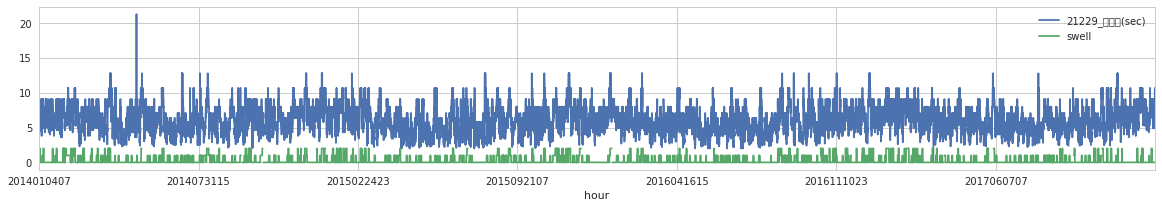

In [46]:
df[['21229_파주기(sec)','swell']].plot()

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


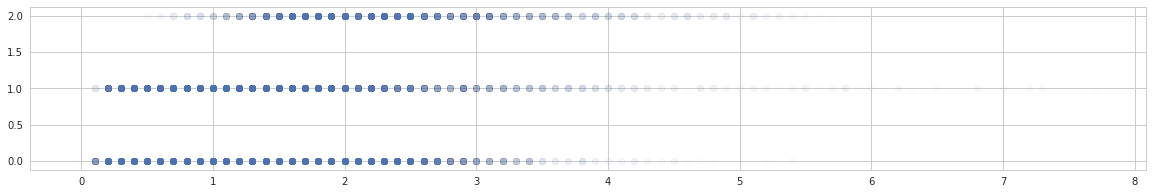

In [47]:
plt.scatter(x=df['22106_유의파고(m)'],y=df['swell'],alpha=0.01)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


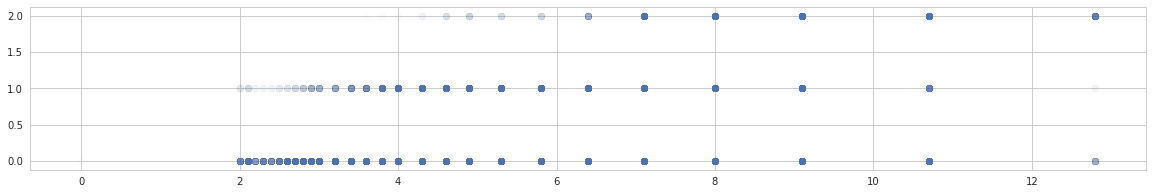

In [48]:
plt.scatter(x=df['22106_파주기(sec)'],y=df['swell'],alpha=0.01)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


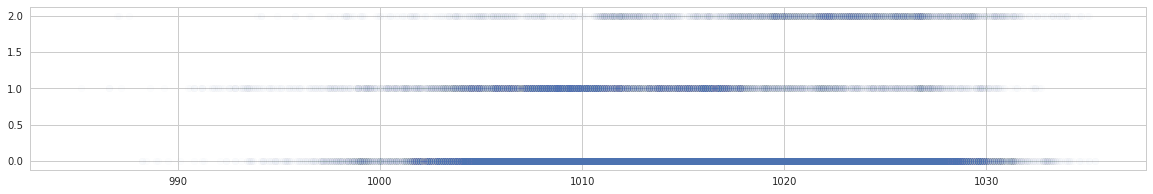

In [49]:
plt.scatter(x=df['22106_현지기압(hPa)'],y=df['swell'],alpha=0.01)

In [50]:
df.corr()['swell(t+1)'].sort_values()

22106_풍향1(deg)          -0.201521
21229_풍향1(deg)          -0.196785
22190_기온(°C)            -0.173879
22105_풍향1(deg)          -0.163233
22105_기온(°C)            -0.155857
21229_기온(°C)            -0.143324
22106_기온(°C)            -0.140937
21229_풍향(deg)           -0.107155
22105_풍향(deg)           -0.074753
22190_수온(°C)            -0.069608
22106_일시                -0.067664
22105_수온(°C)            -0.063591
year                    -0.063519
21229_일시                -0.063410
22106_풍향(deg)           -0.060427
22105_일시                -0.056995
21229_수온(°C)            -0.054050
22106_수온(°C)            -0.044785
22190_일시                -0.040924
day_hour                -0.032746
day                     -0.032466
22190_풍향(deg)           -0.031110
week                    -0.023921
22105_파향(deg)           -0.010515
22190_파향(deg)           -0.007787
month                   -0.003305
22190_습도(%)             -0.000073
22106_파향(deg)            0.006786
21229_습도(%)              0.009609
21229_파향(deg) 